✅ Encoded Heart Disease Data Sample:
   sex  cp  fbs  exang  target
0    1   2    1      1       0
1    0   1    0      1       1
2    1   2    0      1       0
3    1   0    0      1       0
4    1   2    0      1       1

ℹ️ Encoded classes:
sex: ['female', 'male']
cp: ['asymptomatic', 'atypical', 'non-anginal', 'typical']
fbs: [False, True]
exang: ['no', 'yes']
target: ['disease', 'no_disease']


Eliminating: exang: 100%|██████████████████████| 1/1 [00:00<00:00, 1000.07it/s]


🔍 Inference Result (P(Heart Disease | cp='asymptomatic', fbs='true')):
 Target = disease: 0.4360
 Target = no_disease: 0.5640



c:\users\cse-03\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129728 (\U0001fac0) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


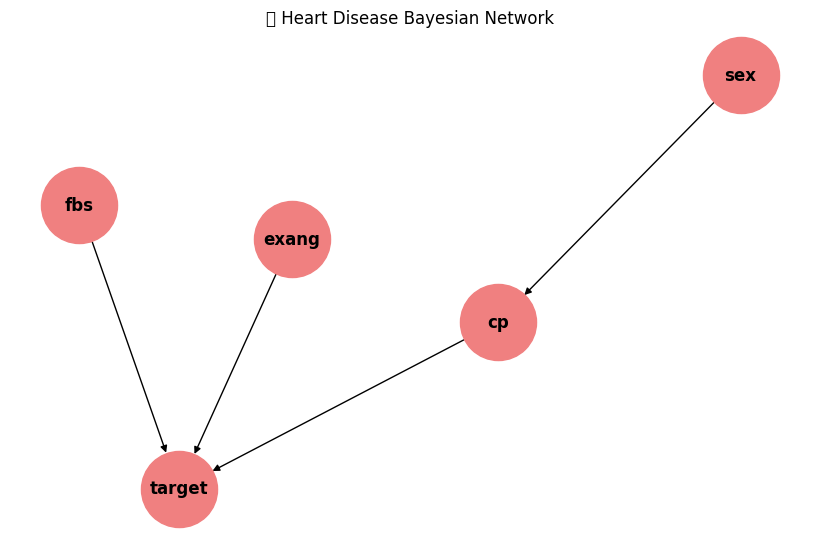

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork

# 1. Load the dataset
data = pd.read_csv('heart_disease.csv') # Replace with your file path if different

# 2. Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("✅ Encoded Heart Disease Data Sample:")
print(data.head())

# 3. Define the Bayesian Network structure
model = BayesianNetwork([
    ('sex', 'cp'),
    ('cp', 'target'),
    ('fbs', 'target'),
    ('exang', 'target')
])

# 4. Learn CPDs using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# 5. Inference
infer = VariableElimination(model)

# View all possible classes (helpful for reference)
print("\nℹ️ Encoded classes:")
for col, le in label_encoders.items():
    print(f"{col}: {list(le.classes_)}")

# Example inference: P(target | cp='asymptomatic', fbs='true')
cp_val = label_encoders['cp'].transform(['asymptomatic'])[0]
fbs_val = label_encoders['fbs'].transform([True])[0]


result = infer.query(variables=['target'], evidence={'cp': cp_val, 'fbs': fbs_val})
target_labels = label_encoders['target'].inverse_transform(range(len(result.values)))

print("\n🔍 Inference Result (P(Heart Disease | cp='asymptomatic', fbs='true')):")
for label, prob in zip(target_labels, result.values):
    print(f" Target = {label}: {prob:.4f}")

# 6. Visualize the Bayesian Network
plt.figure(figsize=(8, 5))
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightcoral',
        font_size=12, font_weight='bold', edge_color='black')
plt.title("🫀 Heart Disease Bayesian Network")
plt.show()


In [2]:
!pip install networkx


   ---------------------------------------- 1.9/1.9 MB 5.9 MB/s eta 0:00:00


In [4]:
!pip install pgmpy


   ---------------------------------------- 2.0/2.0 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 732.8/732.8 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 162.6/162.6 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 9.1/9.1 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 232.9/232.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall pgmpy


In [1]:
!pip install pgmpy==0.1.19

  Using cached pgmpy-0.1.19-py3-none-any.whl.metadata (6.3 kB)
Using cached pgmpy-0.1.19-py3-none-any.whl (1.9 MB)
  Attempting uninstall: pgmpy
    Found existing installation: pgmpy 1.0.0
    Uninstalling pgmpy-1.0.0:
      Successfully uninstalled pgmpy-1.0.0
